In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [3]:
R = np.linspace(0.1,15.,100)

In [4]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Integral_b = []
    for i in range (0,len(R)):
        result = integrate.quad(I_b,0,1,args=(R[i]))[0]
        Integral_b.append(result)
    return 4.*np.pi*G*q_b*rho_b*np.array(Integral_b)

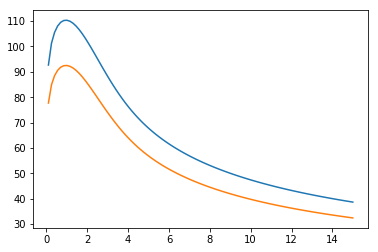

In [5]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)))
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II)))

In [6]:
def I_b_prueba(x,R,rho_b=rho_b_I,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    e = np.sqrt(1. - q_b**2.)
    n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
    d = np.sqrt(1.-x**2.*e**2.)
    t = R**2.*(R/a_b)**(-alpha_b)
    return (t*n)/d

In [7]:
Integral_b = []
y = np.linspace(0.,1.,100)
for i in range (0,len(R)):
    #integrando = lambda x: I_b_prueba(x,R[i])
    result = integrate.simps(I_b_prueba(y,R[i]),y)#quad(I_b,0,1,args=(R[i]))[0]
    Integral_b.append(result)
print Integral_b

[0.6195228350518919, 0.739883230440292, 0.8037390309586567, 0.8426820663841558, 0.865638543085351, 0.8766971492511237, 0.878291798620293, 0.8721542857332946, 0.8596724378905307, 0.8420399883837277, 0.8203207618989867, 0.795474377412639, 0.7683643616581561, 0.7397588837294419, 0.7103293947070932, 0.6806499146201541, 0.6511982712312243, 0.6223597307539127, 0.5944329321638191, 0.567637727218453, 0.5421243718529142, 0.5179834678558131, 0.49525608374286395, 0.4739435635816307, 0.45401663978654355, 0.43542358254840813, 0.41809723093043083, 0.40196084940213633, 0.38693283329645306, 0.3729303453233589, 0.35987200341615594, 0.34767976017647434, 0.33628011940301417, 0.3256048293981596, 0.3155911795927562, 0.3061820097144338, 0.29732552182763494, 0.28897496699506886, 0.2810882613103014, 0.2736275713398907, 0.266558896870744, 0.259851669256165, 0.25347837636779086, 0.24741421986036935, 0.24163680677544977, 0.23612587509178098, 0.23086305135548238, 0.2258316377239813, 0.2210164254206243, 0.21640353

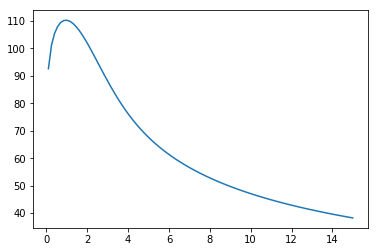

In [8]:
arr = np.array(Integral_b)
plt.plot(R,np.sqrt(4.*np.pi*G*q_b*rho_b_I*arr))

In [9]:
Rx = np.linspace(0.1, 15., 100).reshape(-1, 1)
yp = np.linspace(0.,1.,100).reshape(1,-1)
dx = yp[0,1] - yp[0,0]

In [10]:
fun = I_b_prueba(yp,Rx)
res_int = integrate.simps(fun,dx=dx)
print len(res_int)

100


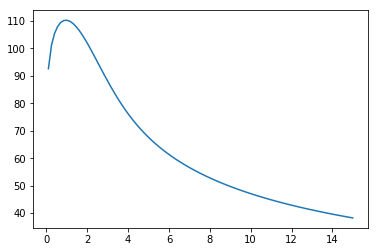

In [11]:
plt.plot(R,np.sqrt(4.*np.pi*G*q_b*rho_b_I*res_int))

In [4]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

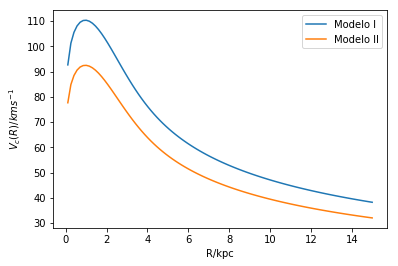

In [6]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)),label='Modelo I')
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II)),label='Modelo II')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Vc2_Bulge.pdf')

In [12]:
""""Integral_b_trap = []
y = np.linspace(0.,1.,100)
integral_x = np.zeros(len(R))
for i in range (0,len(R)):
    #integrando = lambda x: I_b_prueba(x,R[i])
    result_trap = np.trapz(I_b_prueba(y,R[i]),y)#quad(I_b,0,1,args=(R[i]))[0]
    Integral_b_trap.append(result_trap)
print Integral_b_trap

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-12-02487e5dd929>, line 8)

In [13]:
""""arr_trap = np.array(Integral_b_trap)
plt.plot(R,np.sqrt(4.*np.pi*G*q_b*rho_b_I*arr_trap))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-d683e1fe83c4>, line 2)

In [7]:
 def Vc2_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Integral_DM = []
    for i in range (0,len(R)):
        result = integrate.quad(I_h,0,1,args=(R[i]))[0]
        Integral_DM.append(result)
    return 4.*np.pi*G*q_h*rho_h*np.array(Integral_DM)

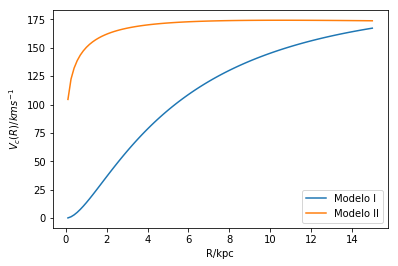

In [8]:
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I)),label='Modelo I')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=alpha_h_II,beta_h=beta_h_II)),label='Modelo II')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Vc2_DMHaloI.pdf')

In [16]:
def Vc2_SD(R,R_d,Sigma_d_SD):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
    return 2.*np.pi*G*Sigma_d_SD*R_d*result

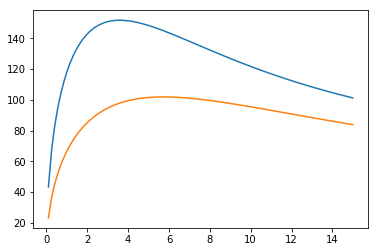

In [17]:
plt.plot(R,np.sqrt(Vc2_SD(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)))
plt.plot(R,np.sqrt(Vc2_SD(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)))

In [9]:
def Vc2_ISM(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

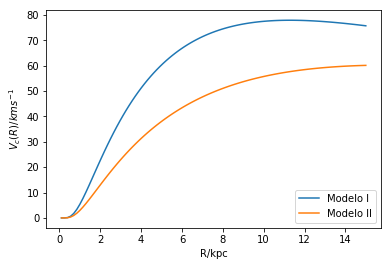

In [10]:
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)),label='Modelo I')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II)),label='Modelo II')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Vc2_ISMapprox.pdf')

In [20]:
def Vc_tot(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [17]:
params_Model_I=np.array([R_d_I,Sigma_d_SD_I,rho_b_I,a_h_I,rho_h_I,alpha_h_I,beta_h_I,Sigma_g_ISM_I])
params_Model_II=np.array([R_d_II,Sigma_d_SD_II,rho_b_II,a_h_II,rho_h_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])

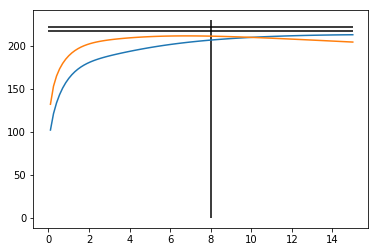

In [23]:
plt.plot(R,Vc_tot(R,params_Model_I))
plt.plot(R,Vc_tot(R,params_Model_II))
plt.hlines(222,0,15)
plt.hlines(217,0,15)
plt.vlines(8,0,230)

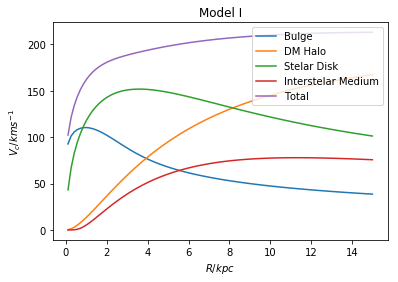

In [23]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I,q_h=q_h)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m)),label='Interstelar Medium')
plt.plot(R,Vc_tot(R,params_Model_I),label='Total')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model I')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Model_I.pdf')

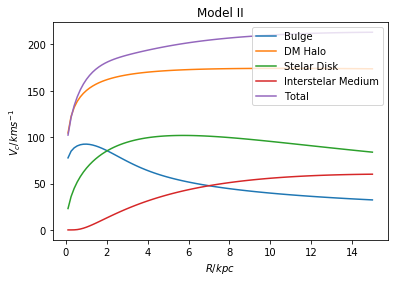

In [24]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=alpha_h_II,beta_h=beta_h_II,q_h=q_h)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m)),label='Interstelar Medium')
plt.plot(R,Vc_tot(R,params_Model_I),label='Total')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model II')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Model_II.pdf')

In [21]:
 def Vc2_SD_exact(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(a,zp,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD = []
    for i in range (0,len(R)):
        integrand = lambda a,zp: I_SD(a,zp,R[i])
        resultado = integrate.dblquad(integrand,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf)[0]
        Integral_SD.append(resultado)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD)/R_d

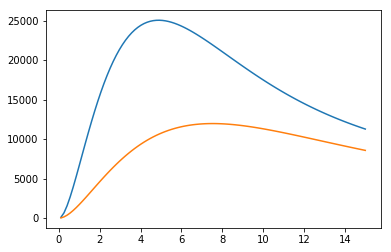

In [22]:
plt.plot(R,Vc2_SD_exact(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I))
plt.plot(R,Vc2_SD_exact(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II))

In [24]:
def Vc_tot_v2(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_exact(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [25]:
def Vc_tot_v2_wo_ISM(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_exact(R,R_d,Sigma_d_SD)
    return np.sqrt(suma)

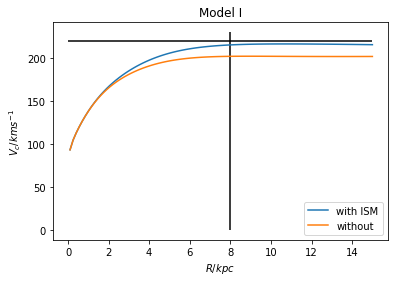

In [26]:
plt.plot(R,Vc_tot_v2(R,params_Model_I),label='with ISM')
plt.plot(R,Vc_tot_v2_wo_ISM(R,params_Model_I),label='without')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model I')
plt.legend(loc='lower right', prop={'size':10})

In [28]:
print Vc_tot_v2(R,params_Model_I)-Vc_tot_v2_wo_ISM(R,params_Model_I)

[0.00000000e+00 8.97402970e-08 7.60476630e-05 1.84896946e-03
 1.21796937e-02 4.27103086e-02 1.05046365e-01 2.07269911e-01
 3.53146794e-01 5.42825057e-01 7.73935406e-01 1.04258682e+00
 1.34411390e+00 1.67358553e+00 2.02612877e+00 2.39712298e+00
 2.78230725e+00 3.17783192e+00 3.58027430e+00 3.98663214e+00
 4.39430324e+00 4.80105689e+00 5.20500072e+00 5.60454581e+00
 5.99837160e+00 6.38539199e+00 6.76472360e+00 7.13565661e+00
 7.49762859e+00 7.85020146e+00 8.19304138e+00 8.52590164e+00
 8.84860805e+00 9.16104681e+00 9.46315435e+00 9.75490896e+00
 1.00363239e+01 1.03074417e+01 1.05683295e+01 1.08190755e+01
 1.10597855e+01 1.12905801e+01 1.15115932e+01 1.17229695e+01
 1.19248633e+01 1.21174370e+01 1.23008601e+01 1.24753079e+01
 1.26409609e+01 1.27980040e+01 1.29466255e+01 1.30870169e+01
 1.32193719e+01 1.33438860e+01 1.34607563e+01 1.35701805e+01
 1.36723570e+01 1.37674842e+01 1.38557602e+01 1.39373826e+01
 1.40125480e+01 1.40814517e+01 1.41442876e+01 1.42012480e+01
 1.42525230e+01 1.429830

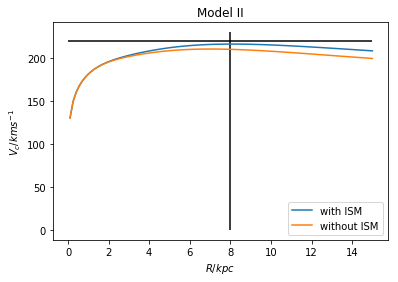

In [27]:
plt.plot(R,Vc_tot_v2(R,params_Model_II),label='with ISM')
plt.plot(R,Vc_tot_v2_wo_ISM(R,params_Model_II),label='without ISM')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model II')
plt.legend(loc='lower right', prop={'size':10})

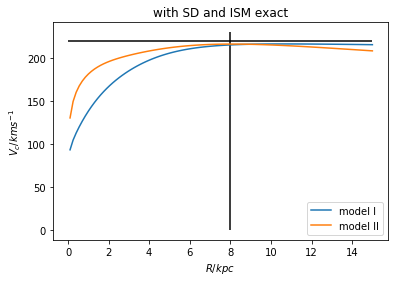

In [29]:
plt.plot(R,Vc_tot_v2(R,params_Model_I),label='model I')
plt.plot(R,Vc_tot_v2(R,params_Model_II),label='model II')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('with SD and ISM exact')
plt.legend(loc='lower right', prop={'size':10})

In [30]:
%timeit Vc_tot_v2(R,params_Model_I)

1 loop, best of 3: 6min per loop


In [31]:
%timeit Vc_tot_v2(R,params_Model_II)

1 loop, best of 3: 6min 12s per loop


In [13]:
def vc2_ISM_exact(R,R_d,Sigma_g_ISM,R_m=R_m):
    def Int_ISM(h,s,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/(2.*R_d) - (R_m)/(R*s*h))
        t4 = (2.*R_m*R_d)/(R**2.*h**2.) - s**2.
        res = R**2.*t1*t2*t3*t4
        return res
    Integral_ISM = []
    for i in range(0,len(R)):
        integrando = lambda h,s: Int_ISM(h,s,R[i])
        result = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
        Integral_ISM.append(result)
    return -4.*G*Sigma_g_ISM*np.array(Integral_ISM)/(2.*R_d)

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


KeyboardInterrupt: 

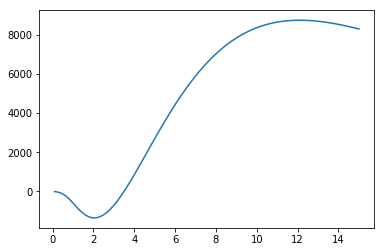

In [14]:
plt.plot(R,vc2_ISM_exact(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I))
plt.plot(R,vc2_ISM_exact(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II))

In [20]:
def Vc_tot_v3(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + vc2_ISM_exact(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

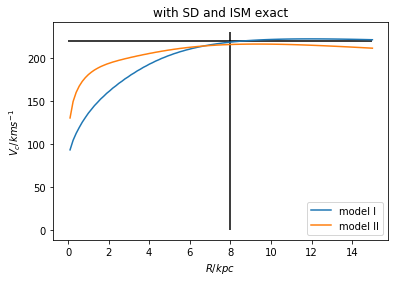

In [22]:
plt.plot(R,Vc_tot_v3(R,params_Model_I),label='model I')
plt.plot(R,Vc_tot_v3(R,params_Model_II),label='model II')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('with SD and ISM exact')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Vc_ISM_and_SD_exact.pdf')

In [35]:
def vc2_ISM_ap(R,R_d,Sigma_g_ISM,R_m=R_m):
    def Int_ISM(h,s,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/(2.*R_d) - (R_m)/(R*s*h))#t4 = (2.*R_m*R_d)/(R**2.*h**2.) - s**2.
        res = R**2.*t1*t2*t3#*t4
        return res
    Integral_ISM = []
    for i in range(0,len(R)):
        integrando = lambda h,s: Int_ISM(h,s,R[i])
        result = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
        Integral_ISM.append(result)
    return 4.*np.pi*G*Sigma_g_ISM*np.array(Integral_ISM)/(2.*R_d)

In [36]:
def Vc_tot_v4(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_exact(R,R_d,Sigma_d_SD) + vc2_ISM_ap(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

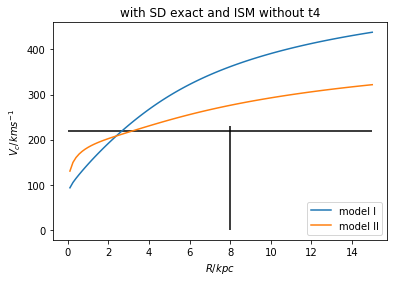

In [37]:
plt.plot(R,Vc_tot_v4(R,params_Model_I),label='model I')
plt.plot(R,Vc_tot_v4(R,params_Model_II),label='model II')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('with SD exact and ISM without t4')
plt.legend(loc='lower right', prop={'size':10})

In [11]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

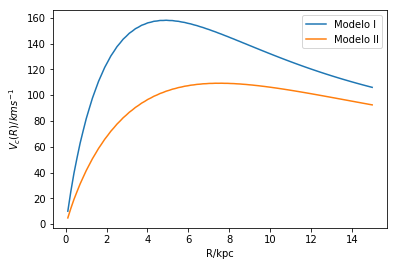

In [12]:
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Modelo I')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)),label='Modelo II')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Vc2_SDsimps.pdf')

In [40]:
%timeit Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)

1 loop, best of 3: 1min 1s per loop


In [24]:
def Vc_tot_SD_exact(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

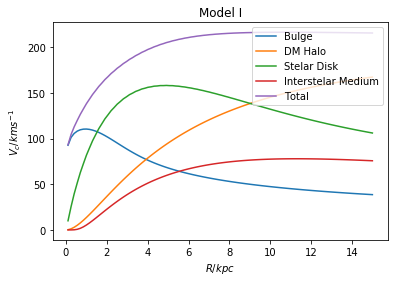

In [25]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=alpha_h_I,beta_h=beta_h_I,q_h=q_h)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m)),label='Interstelar Medium')
plt.plot(R,Vc_tot_SD_exact(R,params_Model_I),label='Total')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model I')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Model_I_v2.pdf')

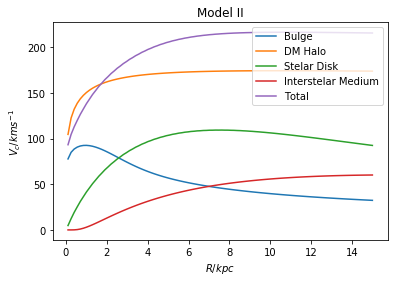

In [27]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=alpha_h_II,beta_h=beta_h_II,q_h=q_h)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m)),label='Interstelar Medium')
plt.plot(R,Vc_tot_SD_exact(R,params_Model_I),label='Total')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model II')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Model_II_v2.pdf')

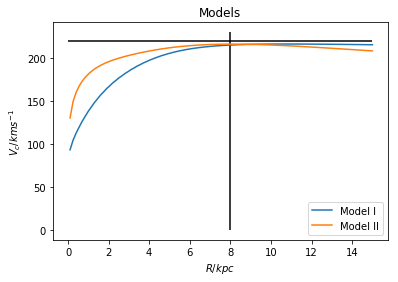

In [34]:
plt.plot(R,Vc_tot_SD_exact(R,params_Model_I),label='Model I')
plt.plot(R,Vc_tot_SD_exact(R,params_Model_II),label='Model II')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Models')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Models_I_II.pdf')

In [28]:
params_Model_I_NFW=np.array([R_d_I,Sigma_d_SD_I,rho_b_I,a_h_I,rho_h_I,1.,3.,Sigma_g_ISM_I])
params_Model_II_NFW=np.array([R_d_II,Sigma_d_SD_II,rho_b_II,a_h_II,rho_h_II,1.,3.,Sigma_g_ISM_II])

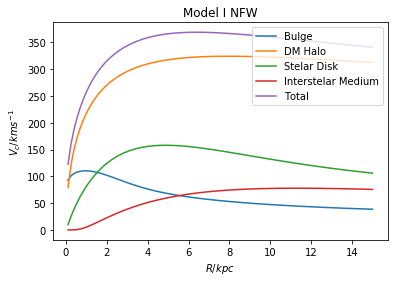

In [30]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_I,rho_h=rho_h_I,alpha_h=1.,beta_h=3.,q_h=q_h)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m)),label='Interstelar Medium')
plt.plot(R,Vc_tot_SD_exact(R,params_Model_I_NFW),label='Total')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model I NFW')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Model_I_v2_NFW.pdf')

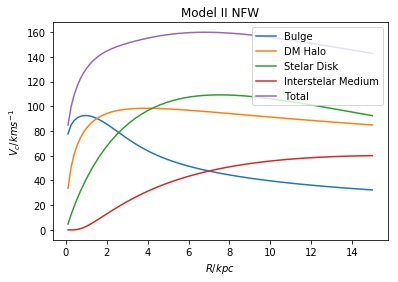

In [31]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_DM(R,a_h=a_h_II,rho_h=rho_h_II,alpha_h=1.,beta_h=3.,q_h=q_h)),label='DM Halo')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m)),label='Interstelar Medium')
plt.plot(R,Vc_tot_SD_exact(R,params_Model_II_NFW),label='Total')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model II NFW')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Model_II_v2_NFW.pdf')

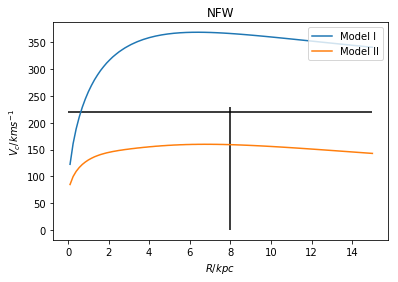

In [32]:
plt.plot(R,Vc_tot_SD_exact(R,params_Model_I_NFW),label='Model I')
plt.plot(R,Vc_tot_SD_exact(R,params_Model_II_NFW),label='Model II')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('NFW')
plt.legend(loc='upper right', prop={'size':10})
plt.savefig('Models_NFW.pdf')

In [26]:
def Vc_tot_v5(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

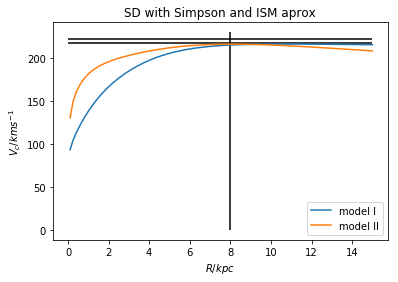

In [27]:
plt.plot(R,Vc_tot_v5(R,params_Model_I),label='model I')
plt.plot(R,Vc_tot_v5(R,params_Model_II),label='model II')
plt.hlines(222,0,15)
plt.hlines(217,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('SD with Simpson and ISM aprox')
plt.legend(loc='lower right', prop={'size':10})

In [43]:
%timeit Vc_tot_v5(R,params_Model_I)

1 loop, best of 3: 1min 5s per loop


In [46]:
def Vc2_ISM_prueba(R,R_d,Sigma_g_ISM,z=0.,zg=0.08):
    def Int_ISM(a,zp,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/(2.*R_d))*t2*t1/d
        f = np.exp(-abs(zp)/zg)
        return R*f*g
    Integral_ISM = []
    for i in range (0,len(R)):
        integrando = lambda a,zp: Int_ISM(a,zp,R[i])
        result = integrate.dblquad(integrando,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf)[0]
        Integral_ISM.append(result)
    return -4.*G*Sigma_g_ISM*np.array(Integral_ISM)/(2.*R_d)

In [47]:
def Vc_tot_v6(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM_prueba(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

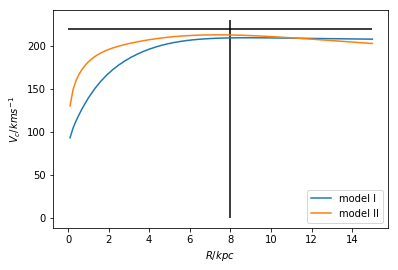

In [48]:
plt.plot(R,Vc_tot_v6(R,params_Model_I),label='model I')
plt.plot(R,Vc_tot_v6(R,params_Model_II),label='model II')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
#plt.title('SD with Simpson and ISM aprox')
plt.legend(loc='lower right', prop={'size':10})

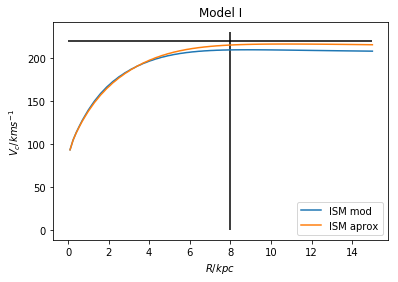

In [49]:
plt.plot(R,Vc_tot_v6(R,params_Model_I),label='ISM mod')
plt.plot(R,Vc_tot_v5(R,params_Model_I),label='ISM aprox')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model I')
plt.legend(loc='lower right', prop={'size':10})

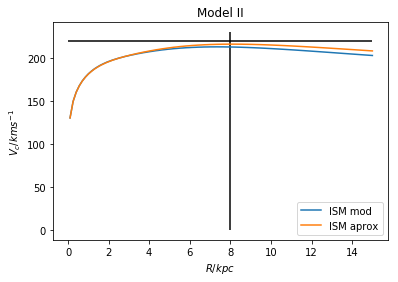

In [50]:
plt.plot(R,Vc_tot_v6(R,params_Model_II),label='ISM mod')
plt.plot(R,Vc_tot_v5(R,params_Model_II),label='ISM aprox')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model II')
plt.legend(loc='lower right', prop={'size':10})

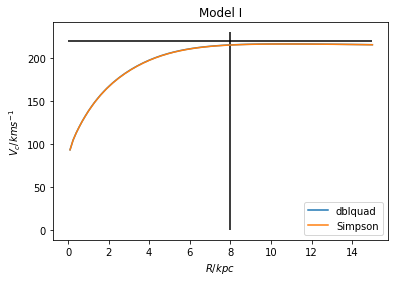

In [44]:
plt.plot(R,Vc_tot_v2(R,params_Model_I),label='dblquad')
plt.plot(R,Vc_tot_v5(R,params_Model_I),label='Simpson')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model I')
plt.legend(loc='lower right', prop={'size':10})

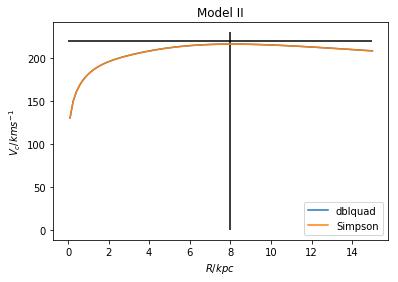

In [45]:
plt.plot(R,Vc_tot_v2(R,params_Model_II),label='dblquad')
plt.plot(R,Vc_tot_v5(R,params_Model_II),label='Simpson')
plt.hlines(220,0,15)
plt.vlines(8,0,230)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Model II')
plt.legend(loc='lower right', prop={'size':10})

In [ ]:
#Integral para encontrar el radio crítico de la velocidad circular para el bulbo

$$\begin{equation}
\frac{dv_{c}^{2}}{dR} = 0 = 4\pi Gq_{b}\rho_{b,0}\left(\frac{R}{a_{b}}\right)^{-\alpha_{b}}\left[ 2R\int_{0}^{1}dx \frac{x^{2-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{1-x^{2}e^{2}}} -\alpha_{b}R \int_{0}^{1}dx \frac{x^{2-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{1-x^{2}e^{2}}} -\frac{2R^{3}}{r_{b}^{2}} \int_{0}^{1}dx \frac{x^{4-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{1-x^{2}e^{2}}}\right]
\end{equation}$$
$$\begin{equation}
\frac{dv_{c}^{2}}{dR} = \left[ 2\int_{0}^{1}dx \frac{x^{2-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{1-x^{2}e^{2}}} -\alpha_{b} \int_{0}^{1}dx \frac{x^{2-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{1-x^{2}e^{2}}} -\frac{2R^{2}}{r_{b}^{2}} \int_{0}^{1}dx \frac{x^{4-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{1-x^{2}e^{2}}}\right]
\end{equation}$$

In [ ]:
def I_b_1(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = 2.*R*(R/a_b)**(-alpha_b)
        return (t*n)/d
def I_b_2(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = -alpha_b*R*(R/a_b)**(-alpha_b)
        return (t*n)/d
def I_b_3(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(4.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = -(2.*R**3./r_b**2.)*(R/a_b)**(-alpha_b)
        return (t*n)/d
Integral_b_1 = []
Integral_b_2 = []
Integral_b_3 = []
for i in range (0,len(R)):
    result = integrate.quad(I_b_1,0,1,args=(R[i]))[0]
    Integral_b_1.append(result)
for i in range (0,len(R)):
    result = integrate.quad(I_b_2,0,1,args=(R[i]))[0]
    Integral_b_2.append(result)
for i in range (0,len(R)):
    result = integrate.quad(I_b_3,0,1,args=(R[i]))[0]
    Integral_b_3.append(result)
    #return 4.*np.pi*G*q_b*rho_b*np.array(Integral_b)

In [ ]:
print np.exp(20.85106678)

In [ ]:
plt.plot(R,4.*np.pi*G*q_b*rho_b_I*np.array(Integral_b_1) + 4.*np.pi*G*q_b*rho_b_I*np.array(Integral_b_2) + 4.*np.pi*G*q_b*rho_b_I*np.array(Integral_b_3))
#plt.plot(R,)
#plt.plot(R,)
#plt.hlines(-10000,10000,1.9)
plt.hlines(0,0,15)
plt.plot(R,Vc2_b(R,rho_b_I))
plt.plot(R,Vc2_b(R,rho_b_II))
plt.vlines(1.0,-2500,12500)
plt.xlim(0,15)

In [ ]:
import Table
fout = open('mytable.tex','w')
t = Table.Table(6, justs='lrc', caption='Awesome results', label="tab:label")
t.add_header_row(['obj', 'X', '$\\beta$'])
col1 = ['obj1','obj2','obj3']
col2 = [0.001,0.556,10.56]   # just numbers
col3 = [[0.12345,0.1],[0.12345,0.01],[0.12345,0.001]]
t.add_data([col1,col2,col3], sigfigs=2)
t.print_table(fout)
fout.close()